# Introduction to Spatial Data Analysis in Python 

In [1]:
import os, sys, glob
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# vector / visualisation packages
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc
import geoplot.crs as gcrs

# raster packages
import rasterio as rio
import georasters as gr
from rasterstats import zonal_stats

# spatial econometrics 
import pysal as ps
import esda
import libpysal as lps
from pysal.lib.weights.weights import W


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


# Vector data 

From [Natural Earth](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/110m_cultural.zip)

In [2]:
cities = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places.zip")

In [3]:
countries = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip')

In [4]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [5]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,ルクセンブルク市,룩셈부르크,Luxemburg,Luksemburg,Luxemburg,Lüksemburg,Luxembourg,4,1159146437,POINT (6.13000 49.61166)


## Making Maps

Text(0.5, 1, 'World Map')

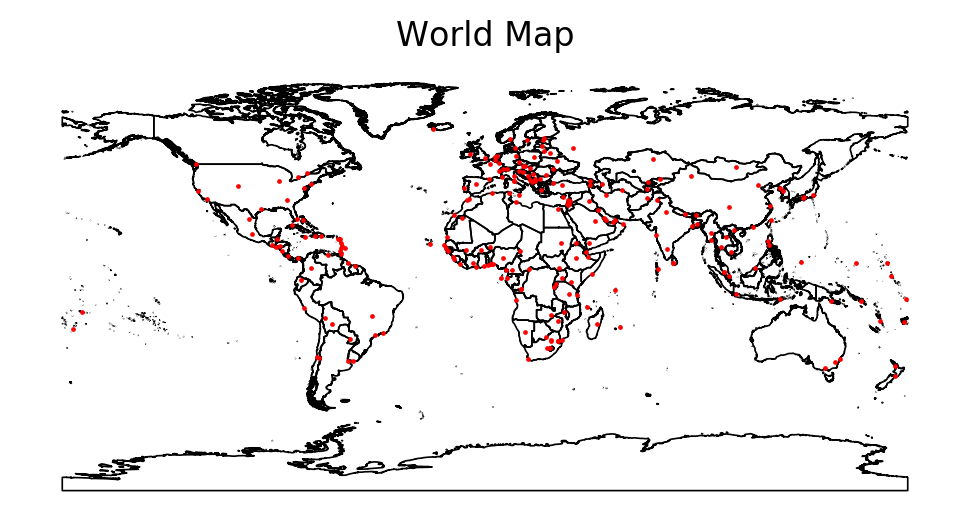

In [6]:
f, ax = plt.subplots(dpi = 200)
countries.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
cities.plot(markersize = 0.5, facecolor = 'red', ax = ax)
ax.set_title('World Map')
ax.set_axis_off()

## Static Webmaps

/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/geoplot/geoplot.py:685: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '


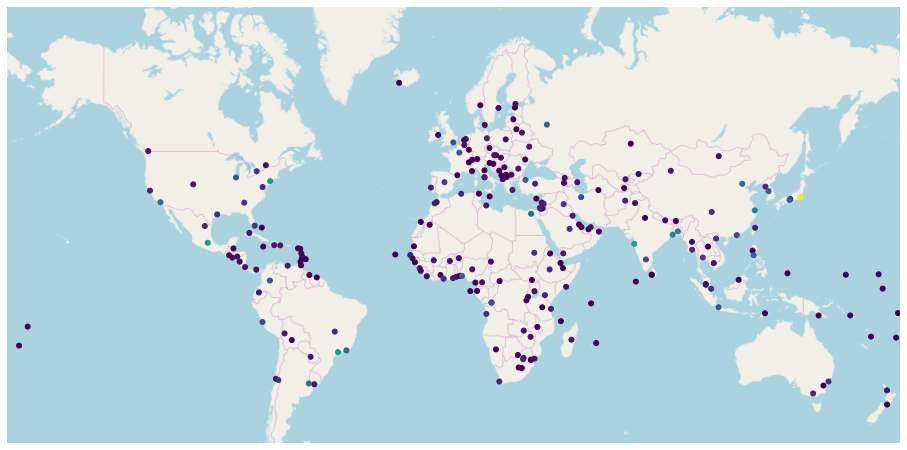

In [39]:
ax = gplt.webmap(countries, projection=gplt.crs.WebMercator(), figsize = (16, 12))
gplt.pointplot(cities, ax=ax, hue = 'POP2015')

## Aside on Projections

Map projections flatten a globe's surface onto a 2D plane. This necessarily distorts the surface (one of Gauss' lesser known results), so one must choose specific form of 'acceptable' distortion.

By convention, the standard projection in GIS is World Geodesic System(lat/lon - `WGS84`). This is a cylindrical projection, which stretches distances east-west and *results in incorrect distance and areal calculations*. For accurate distance and area calculations, try to use UTM (which divides map into zones). See [epsg.io](epsg.io)

In [8]:
countries.crs

{'init': 'epsg:4326'}

In [9]:
countries_2 = countries.copy()
countries_2 = countries_2.to_crs({'init': 'epsg:3035'})

Text(0.5, 1, 'World Map - \n Lambert Azimuthal Equal Area')

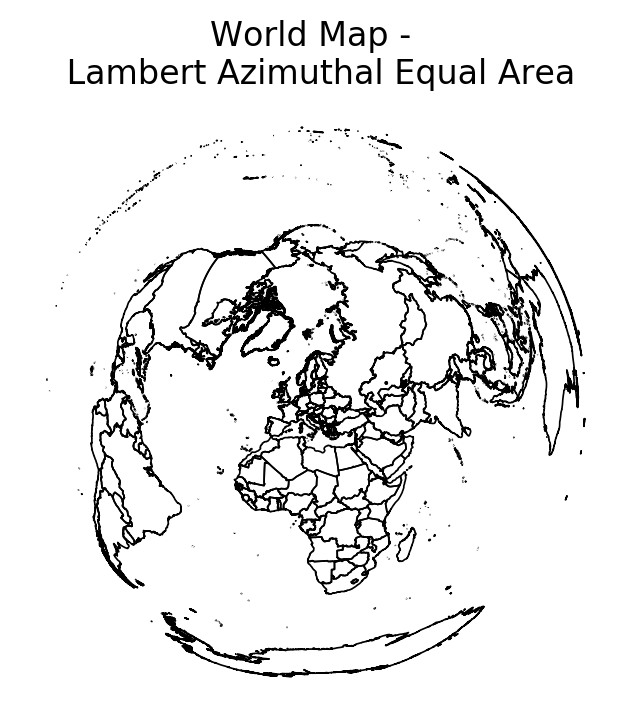

In [10]:
f, ax = plt.subplots(dpi = 200)
countries_2.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
ax.set_title('World Map - \n Lambert Azimuthal Equal Area')
ax.set_axis_off()

## Choropleths

Maps with color-coding based on value in table

+ scheme=None—A continuous colormap.
+ scheme=”Quantiles”—Bins the data such that the bins contain equal numbers of samples.
+ scheme=”EqualInterval”—Bins the data such that bins are of equal length.
+ scheme=”FisherJenks”—Bins the data using the Fisher natural breaks optimization procedure.

(Example from geoplots gallery)

Text(0.5, 1.0, 'scheme=None')

Text(0.5, 1.0, 'scheme="Quantiles"')

Text(0.5, 1.0, 'scheme="EqualInterval"')

Text(0.5, 1.0, 'scheme="FisherJenks"')

Text(0.5, 0.98, 'California State Districts by Area, 2010')

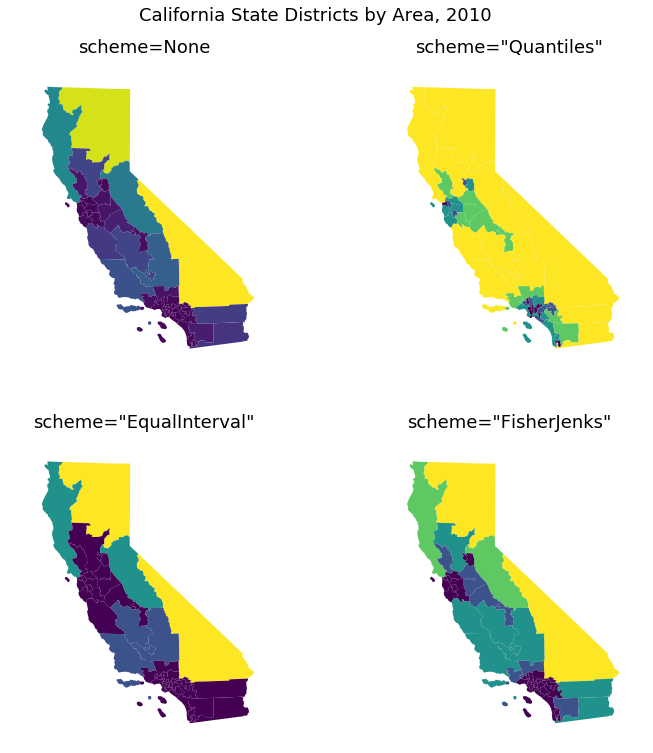

In [11]:
cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
cali['area'] =cali.geometry.area

proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)
fig, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': proj})

gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=None, ax=axarr[0][0]
)
axarr[0][0].set_title('scheme=None', fontsize=18)

scheme = mc.Quantiles(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[0][1]
)
axarr[0][1].set_title('scheme="Quantiles"', fontsize=18)

scheme = mc.EqualInterval(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[1][0]
)
axarr[1][0].set_title('scheme="EqualInterval"', fontsize=18)

scheme = mc.FisherJenks(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[1][1]
)
axarr[1][1].set_title('scheme="FisherJenks"', fontsize=18)

plt.subplots_adjust(top=0.92)
plt.suptitle('California State Districts by Area, 2010', fontsize=18)

## Spatial Merge

Subset to Africa

In [12]:
afr = countries.loc[countries.CONTINENT == 'Africa']

Subset cities by merging with African boundaries

In [13]:
afr_cities = gpd.sjoin(cities, afr, how='inner')

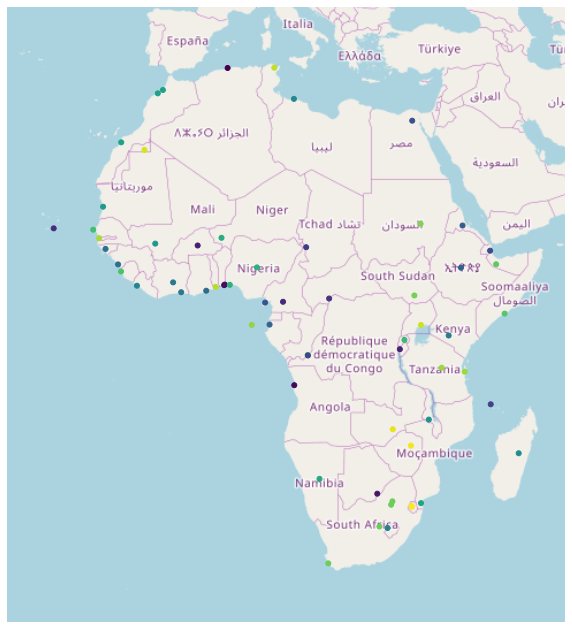

In [38]:
ax = gplt.webmap(afr, projection=gplt.crs.WebMercator(), figsize = (10, 14))
gplt.pointplot(afr_cities, ax=ax, hue = 'NAME_EN')

In [36]:
afr_cities.head()

,SCALERANK,NATSCALE,LABELRANK_left,FEATURECLA,NAME_left,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,スワジランド,스와질란드,Swaziland,Suazi,eSwatini,Свазиленд,Swaziland,Svaziland,Swaziland,斯威士兰
16,4,50,8,Admin-0 capital,Mbabane,None,None,0,Mbabane,1.0,...,スワジランド,스와질란드,Swaziland,Suazi,eSwatini,Свазиленд,Swaziland,Svaziland,Swaziland,斯威士兰
9,6,30,0,Admin-0 capital alt,Bir Lehlou,None,None,0,Bir Lehlou,0.0,...,西サハラ,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉
12,6,30,0,Admin-0 capital,Moroni,None,None,0,Moroni,1.0,...,コモロ,코모로,Comoren,Komory,Comores,Коморы,Komorerna,Komorlar,Comoros,葛摩
15,4,50,0,Admin-0 capital,Kigali,None,None,0,Kigali,1.0,...,ルワンダ,르완다,Rwanda,Rwanda,Ruanda,Руанда,Rwanda,Ruanda,Rwanda,卢旺达


## Buffers

In [15]:
afr_cities_buf = afr_cities.buffer(1)

Text(0.5, 1, '1 decimal degree buffer \n Major cities in Africa')

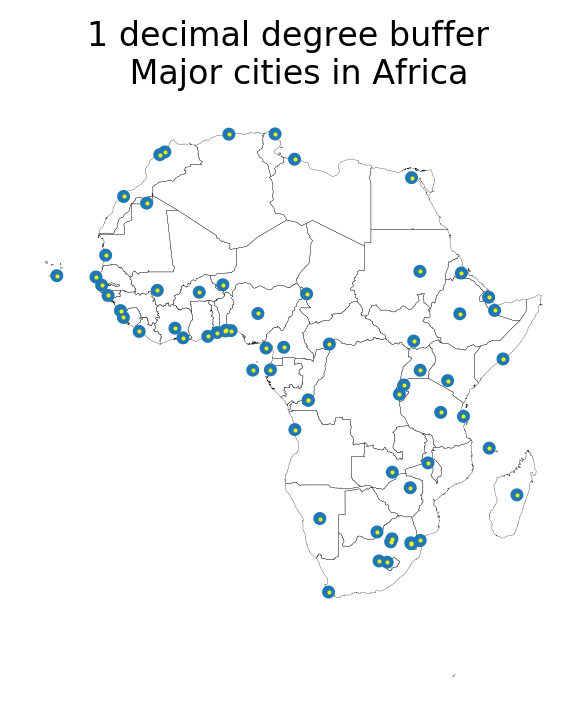

In [16]:
f, ax = plt.subplots(dpi = 200)
afr.plot(facecolor = 'None', edgecolor = 'k', linewidth = 0.1, ax = ax)
afr_cities_buf.plot(ax=ax, linewidth=0)
afr_cities.plot(ax=ax, markersize=.2, color='yellow')
ax.set_title('1 decimal degree buffer \n Major cities in Africa', fontsize = 12)
ax.set_axis_off()

# Raster Data 

In [17]:
raster = 'data/res03_crav6190h_sihr_cer.tif'

In [18]:
# Get info on raster
NDV, xsize, ysize, GeoT, Projection, DataType = gr.get_geo_info(raster)

grow = gr.load_tiff(raster)
grow = gr.GeoRaster(grow, GeoT, projection = Projection)

Text(0.5, 1.05, 'GAEZ Crop Suitability Measures')

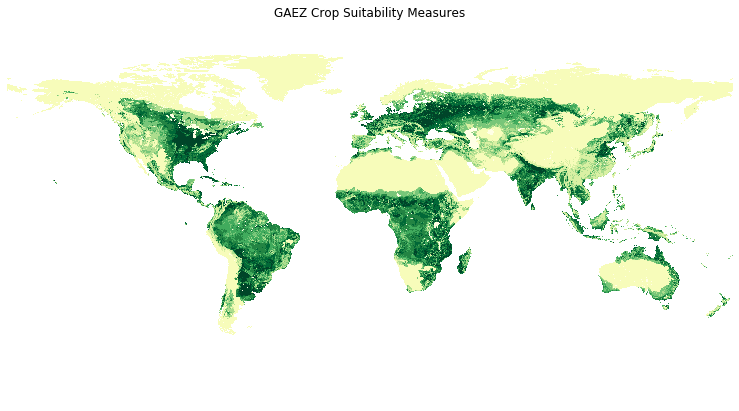

In [19]:
f, ax = plt.subplots(1, figsize=(13, 11))
grow.plot(ax = ax, cmap = 'YlGn_r')
ax.set_title('GAEZ Crop Suitability Measures')
ax.set_axis_off()

## Clipping Raster 

In [20]:
brazil = countries.query('ADMIN == "Brazil"')

In [21]:
grow_clip = grow.clip(brazil)[0]

Text(0.5, 1.05, 'GAEZ Crop Suitability Measures')

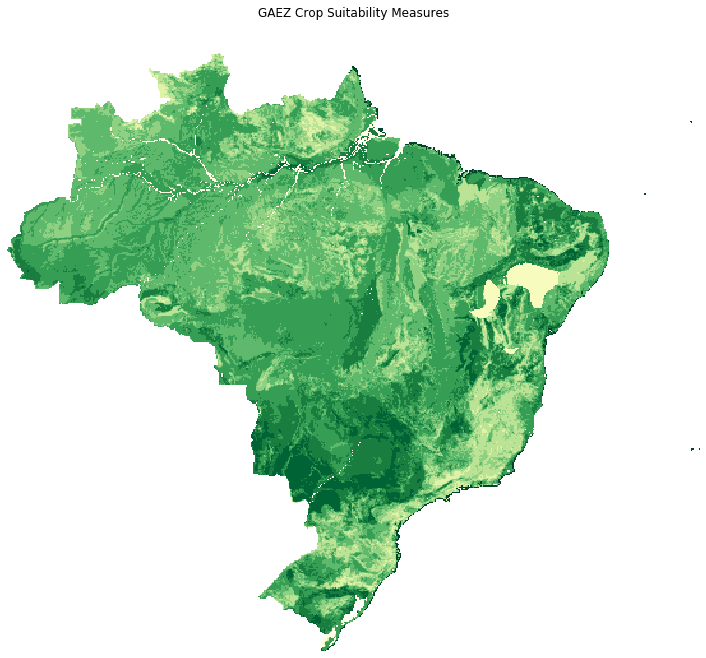

In [22]:
f, ax = plt.subplots(1, figsize=(13, 11))
grow_clip.plot(ax = ax, cmap = 'YlGn_r')
ax.set_title('GAEZ Crop Suitability Measures')
ax.set_axis_off()

## Zonal Statistics 

In [23]:
murdock = gpd.read_file('https://scholar.harvard.edu/files/nunn/files/murdock_shapefile.zip')

In [24]:
murdock_cs = gpd.GeoDataFrame.from_features((zonal_stats(murdock, raster, geojson_out = True)))

Text(0.5, 1.0, 'Crop Suitability by Homeland \n Murdock Atlas')

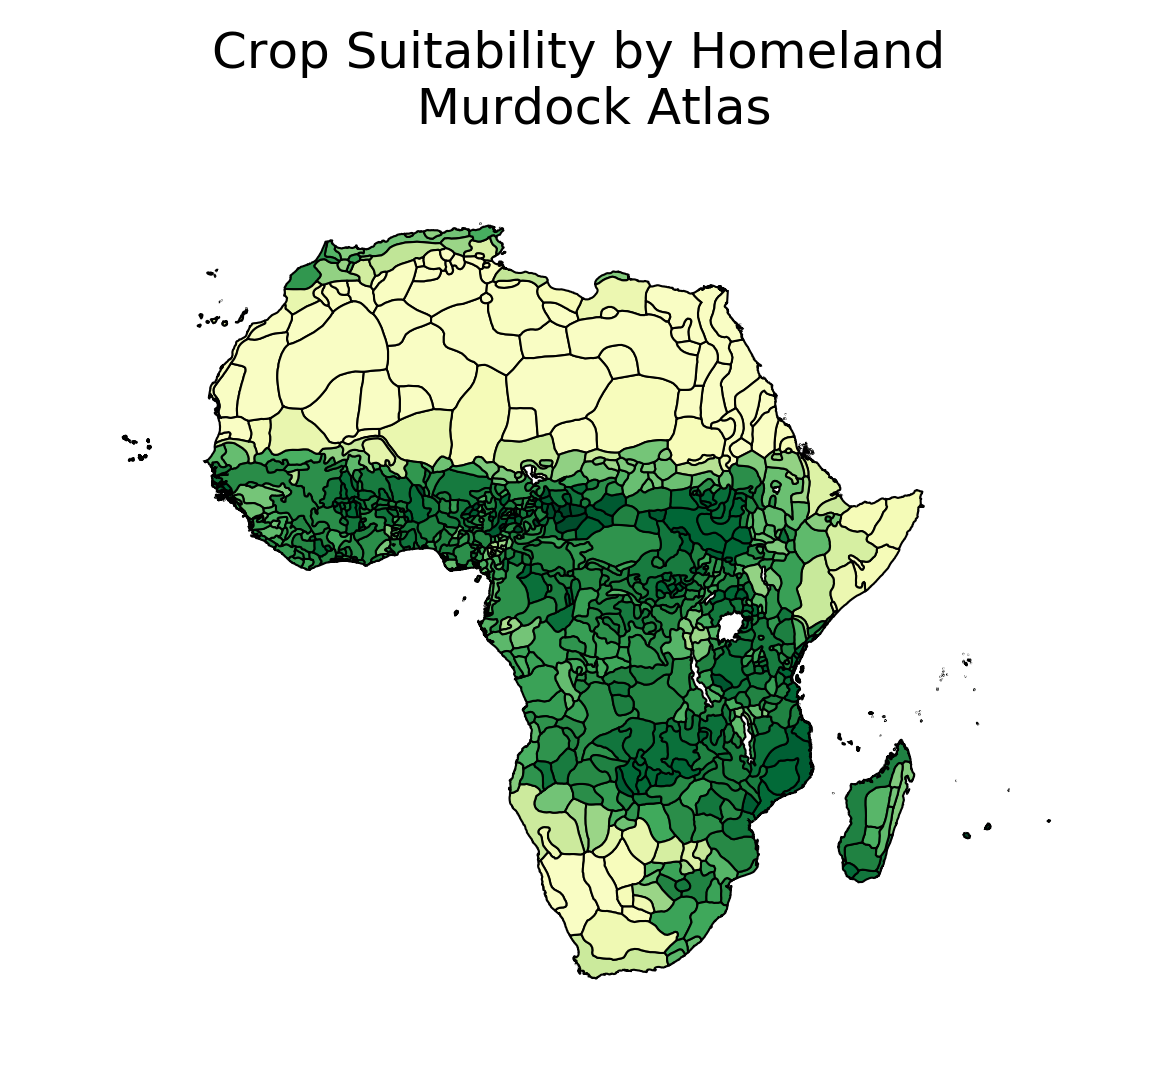

In [25]:
f, ax = plt.subplots(dpi = 300)
gplt.choropleth(
    murdock_cs, hue='mean', linewidth=.5, cmap='YlGn_r', ax=ax
)
ax.set_title('Crop Suitability by Homeland \n Murdock Atlas', fontsize = 12)


# Spatial Econometrics 

## Weight Matrices

In [26]:
%time w = lps.weights.Queen.from_dataframe(murdock_cs)

CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 503 ms


/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/libpysal/weights/weights.py:165: UserWarning: The weights matrix is not fully connected: 
 There are 65 disconnected components.
 There are 63 islands with ids: 8, 18, 21, 38, 56, 60, 67, 100, 103, 110, 127, 130, 134, 144, 153, 154, 179, 186, 197, 201, 249, 266, 267, 281, 286, 294, 298, 314, 335, 364, 391, 397, 462, 469, 480, 481, 549, 557, 562, 571, 619, 632, 634, 643, 653, 665, 667, 678, 682, 685, 691, 727, 749, 757, 781, 787, 789, 790, 791, 792, 793, 800, 832.
  warnings.warn(message)


In [27]:
w.n
w.mean_neighbors

843

5.029655990510083

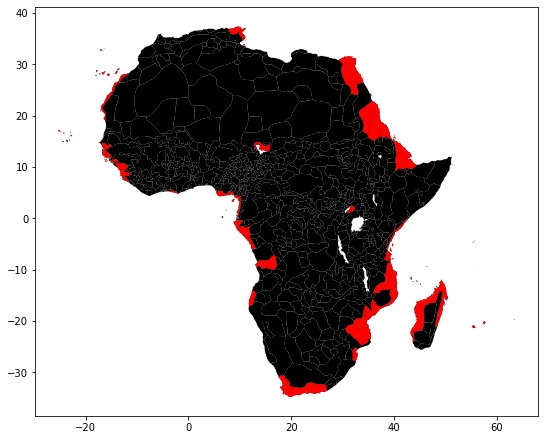

In [28]:
ax = murdock_cs.plot(color='k', figsize=(9, 9))
murdock_cs.loc[w.islands, :].plot(color='red', ax=ax);

In [29]:
mur = murdock_cs.drop(w.islands)

In [30]:
%time w = lps.weights.Queen.from_dataframe(mur)
w.transform = 'r'

CPU times: user 297 ms, sys: 15.6 ms, total: 312 ms
Wall time: 304 ms


/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/libpysal/weights/weights.py:165: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


### Moran's I

Measure of spatial correlation

$$I = \frac{N}{W} \frac{\sum_i \sum_j w_{ij} (x_i - \bar{x} ) ( x_j - \bar{x} ) }{ \sum_i (x_i - \bar{x})^2 }$$

where $N$ is the total number of units, $x$ is the variable of interest, $w_{ij}$ is the spatial weight between units $i$ and $j$, and $W$ is the sum of all weights $w_{ij}$

$I \in [-1, 1]$. Under null of no spatial correlation, $E(I) = \frac{-1}{N-1} \rightarrow 0$ with large $N$. 

In [31]:
mur.shape

(780, 9)

In [32]:
mi = esda.moran.Moran(mur['mean'], w)
mi.I
mi.p_sim

0.7994262412596213

0.001

## Spatial Lag

In [33]:
mur['cs'] = (mur['mean'] - mur['mean'].mean()) / mur['mean'].std()

In [34]:
mur['lag_cs'] = lps.weights.lag_spatial(w, mur['cs'])

Text(1.75, 0.5, 'HH')

Text(1.5, -1.5, 'HL')

Text(-1, 1, 'LH')

Text(-1.0, -1.5, 'LL')

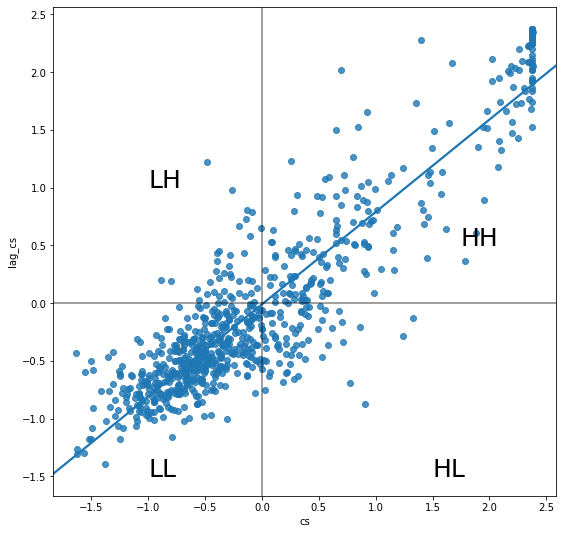

In [35]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='cs', y='lag_cs', data=mur, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-1, 1, "LH", fontsize=25)
plt.text(-1.0, -1.5, "LL", fontsize=25)
# Display
plt.show()